In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# Load the datasets
ideal_data = pd.read_csv("Hackathon_Ideal_Data.csv")
working_data = pd.read_csv("Hackathon_Working_Data.csv")

In [ ]:
# Define the target variable
target = 'VALUE'
X_train = ideal_data.drop(columns=[target])
y_train = ideal_data[target]
X_test = working_data.drop(columns=[target])

# Encode categorical features
X_train_encoded = pd.get_dummies(X_train, columns=['MONTH', 'STORECODE', 'GRP', 'SGRP', 'SSGRP', 'CMP', 'MBRD', 'BRD'])
X_test_encoded = pd.get_dummies(X_test, columns=['MONTH', 'STORECODE', 'GRP', 'SGRP', 'SSGRP', 'CMP', 'MBRD', 'BRD'])

# Align the test set with the train set
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Split the training data for validation
X_train_encoded, X_val_encoded, y_train, y_val = train_test_split(X_train_encoded, y_train, test_size=0.2, random_state=42)

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Train the regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Predict on validation set and calculate MSE
y_val_pred = model.predict(X_val_scaled)
val_mse = mean_squared_error(y_val, y_val_pred)
print(f'Validation Mean Squared Error: {val_mse}')

Validation Mean Squared Error: 1.43083688507039e+32


In [ ]:
# Predict on the test set
working_data[target] = model.predict(X_test_scaled)
working_data.to_csv("Updated_Hackathon_Working_Data.csv", index=False)

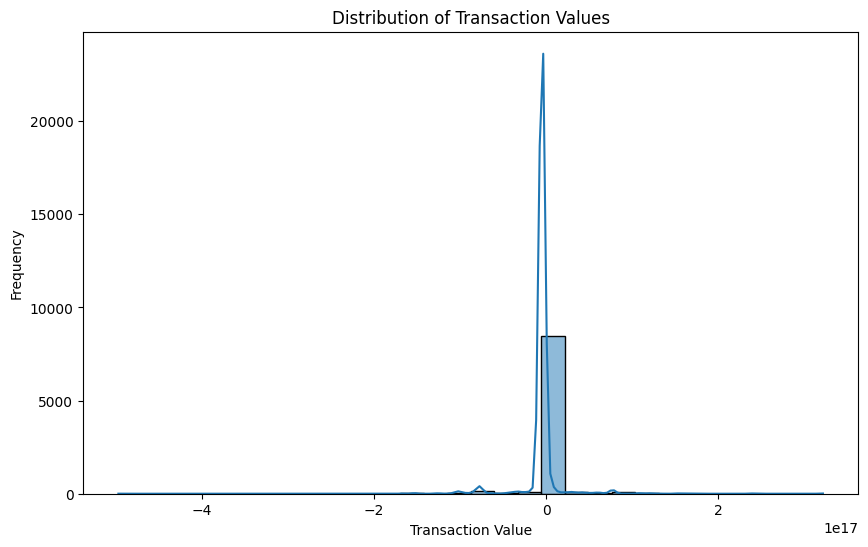

In [ ]:
# Exploratory Data Analysis
# Distribution of transaction values
plt.figure(figsize=(10, 6))
sns.histplot(working_data['VALUE'], bins=30, kde=True)
plt.title('Distribution of Transaction Values')
plt.xlabel('Transaction Value')
plt.ylabel('Frequency')
plt.show()

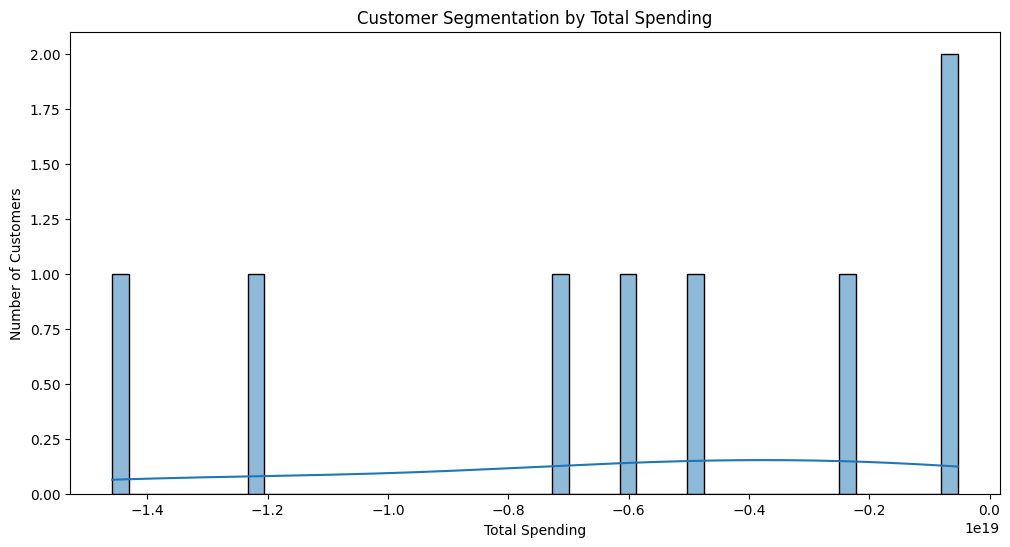

In [ ]:
# Customer segmentation based on total spending
customer_segments = working_data.groupby('STORECODE')['VALUE'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.histplot(customer_segments['VALUE'], bins=50, kde=True)
plt.title('Customer Segmentation by Total Spending')
plt.xlabel('Total Spending')
plt.ylabel('Number of Customers')
plt.show()

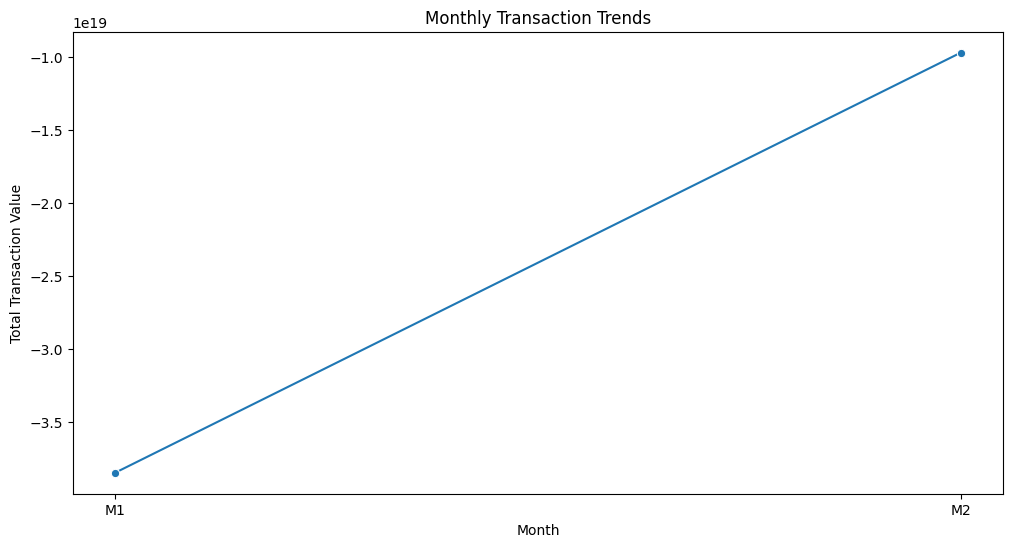

In [ ]:
# Monthly transaction trends
monthly_trends = working_data.groupby('MONTH')['VALUE'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trends, x='MONTH', y='VALUE', marker='o')
plt.title('Monthly Transaction Trends')
plt.xlabel('Month')
plt.ylabel('Total Transaction Value')
plt.show()

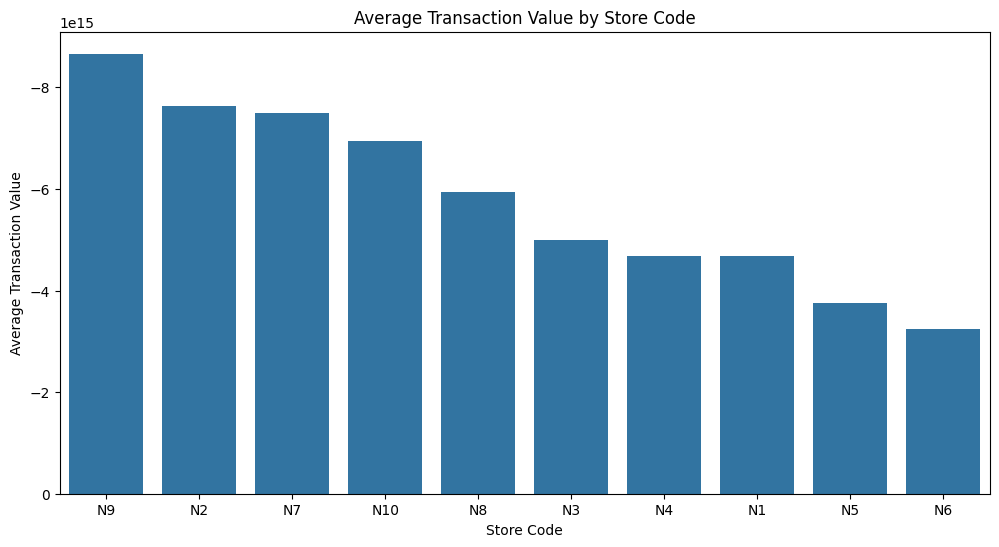

In [35]:
# Calculate the average transaction value by store
average_value_store = working_data.groupby('STORECODE')['VALUE'].mean().reset_index()

# Sort the DataFrame by the average transaction value in ascending order
average_value_store = average_value_store.sort_values(by='VALUE')

# Set the order of the x-axis labels
order = average_value_store['STORECODE']

# Plot the barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=average_value_store, x='STORECODE', y='VALUE', order=order)
plt.gca().invert_yaxis()  # Invert the y-axis
plt.title('Average Transaction Value by Store Code')
plt.xlabel('Store Code')
plt.ylabel('Average Transaction Value')
plt.show()

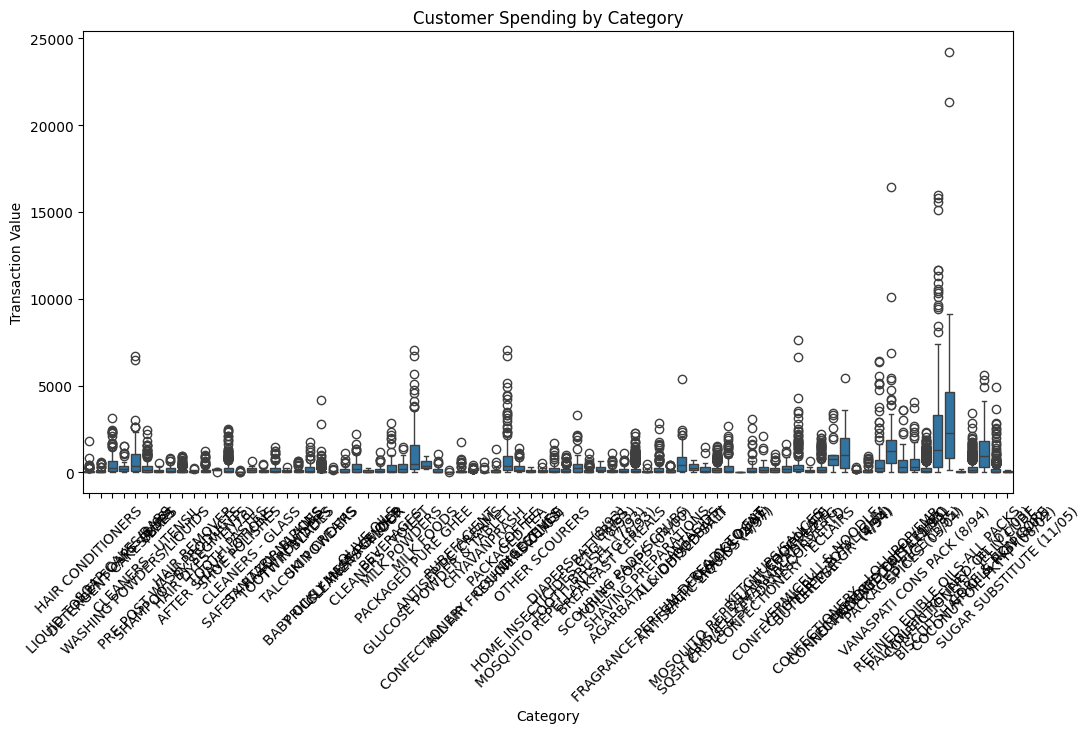

In [ ]:
# Customer spending behavior by category
plt.figure(figsize=(12, 6))
sns.boxplot(data=ideal_data, x='GRP', y='VALUE')
plt.title('Customer Spending by Category')
plt.xlabel('Category')
plt.ylabel('Transaction Value')
plt.xticks(rotation=45)
plt.show()

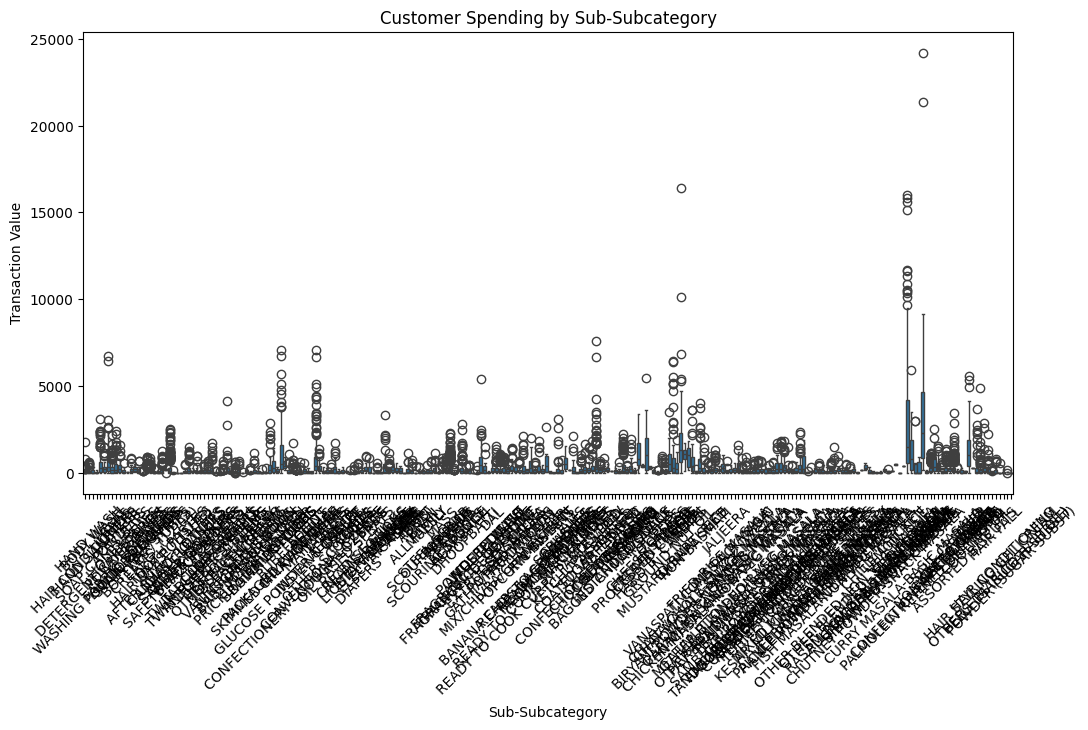

In [36]:
 # Customer spending behavior by sub-subcategory
plt.figure(figsize=(12, 6))
sns.boxplot(data=ideal_data, x='SSGRP', y='VALUE')
plt.title('Customer Spending by Sub-Subcategory')
plt.xlabel('Sub-Subcategory')
plt.ylabel('Transaction Value')
plt.xticks(rotation=45)
plt.show()

<ipython-input-17-f70ad9399f60>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=ideal_data, x='MONTH', y='QTY', estimator='sum', ci=None)


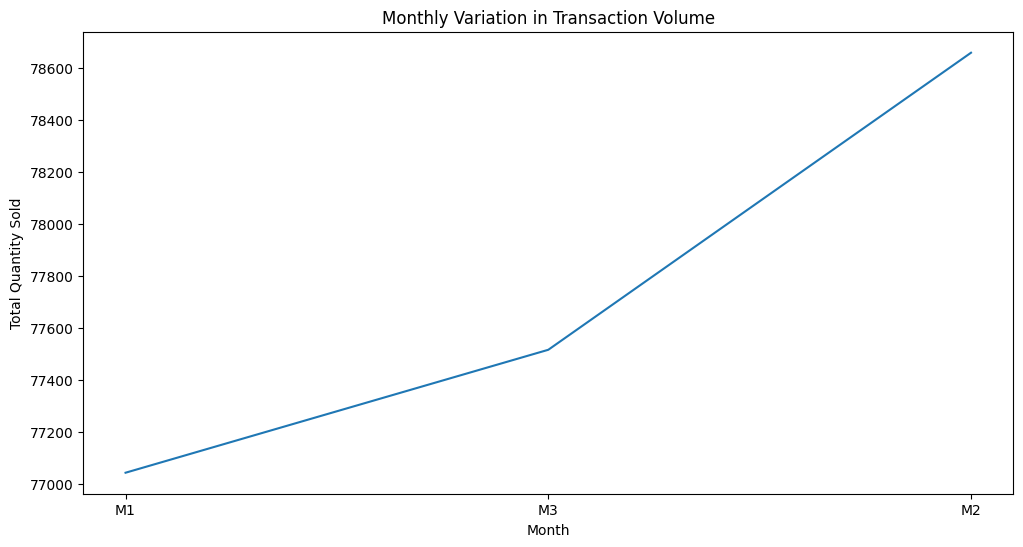

In [ ]:
# Monthly variation in transaction volume
plt.figure(figsize=(12, 6))
sns.lineplot(data=ideal_data, x='MONTH', y='QTY', estimator='sum', ci=None)
plt.title('Monthly Variation in Transaction Volume')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.show()